In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random
import pickle
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
DIRECTORY=r'/content/drive/MyDrive/tomatosample2'
CATEGORIES=['Bacterial_spot','Curl_Virus','Late_blight','Septoria_Spot','Target_Spot']

In [ ]:
IMG_SIZE=100;
data=[]

for category in CATEGORIES:
    folder=os.path.join(DIRECTORY,category)
    label=CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_arr=cv2.imread(img_path)
        try:
           img_arr = cv2.resize(img_arr, (IMG_SIZE,IMG_SIZE))
           #print(img.shape)
        except:
           break
        #img_arr=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
        data.append([img_arr,label])

KeyboardInterrupt: ignored

In [ ]:
len(data)

9086

In [ ]:
X=[]
Y=[]

for features,labels in data:
    X.append(features)
    Y.append(labels)

In [ ]:
X=np.array(X)
Y=np.array(Y)

X=X/255

In [ ]:
X.shape

print(Y)

[0 0 0 ... 4 4 4]


In [ ]:
pickle.dump(data,open("dataset",'wb'))

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Conv2D(64,(3,3), activation='relu' ) )
model.add( MaxPooling2D( (2,2) ) )

model.add( Flatten() )

model.add( Dense(128,input_shape=X.shape[1:],activation='relu') )
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X,Y,epochs=10,validation_split=0.1)

Epoch 1/10
256/256 [==============================] - 156s 609ms/step - loss: 0.1356 - accuracy: 0.9496 - val_loss: 0.2989 - val_accuracy: 0.8933
Epoch 2/10
256/256 [==============================] - 152s 594ms/step - loss: 0.1061 - accuracy: 0.9616 - val_loss: 0.3096 - val_accuracy: 0.8977
Epoch 3/10
256/256 [==============================] - 154s 600ms/step - loss: 0.0908 - accuracy: 0.9669 - val_loss: 0.5759 - val_accuracy: 0.8075
Epoch 4/10
256/256 [==============================] - 155s 607ms/step - loss: 0.0889 - accuracy: 0.9688 - val_loss: 0.4665 - val_accuracy: 0.8515
Epoch 5/10
256/256 [==============================] - 153s 598ms/step - loss: 0.0584 - accuracy: 0.9787 - val_loss: 0.1215 - val_accuracy: 0.9626
Epoch 6/10
256/256 [==============================] - 153s 597ms/step - loss: 0.0579 - accuracy: 0.9786 - val_loss: 0.0740 - val_accuracy: 0.9714
Epoch 7/10
256/256 [==============================] - 151s 591ms/step - loss: 0.0570 - accuracy: 0.9797 - val_loss: 0.3777 -

In [ ]:
history = model.fit(X,Y,epochs=2,validation_split=0.1)

Epoch 1/2
256/256 [==============================] - 151s 591ms/step - loss: 0.0247 - accuracy: 0.9913 - val_loss: 0.1920 - val_accuracy: 0.9472
Epoch 2/2
256/256 [==============================] - 152s 595ms/step - loss: 0.0481 - accuracy: 0.9834 - val_loss: 0.3352 - val_accuracy: 0.8900


In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


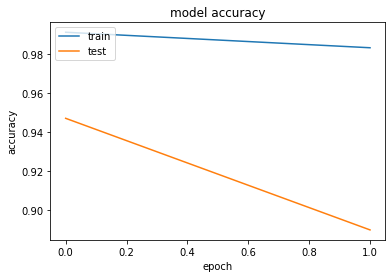

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

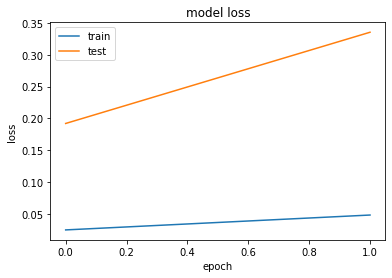

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [ ]:
model.save("my_model1")
#model.save("/content/drive/MyDrive/Models/models")

INFO:tensorflow:Assets written to: my_model1/assets


TOMATO TARGET SPOT


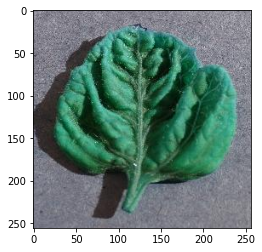

In [ ]:
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow

import gradio as gr


#test_img = ''
#test_img_path = tf.keras.utils.get_file('Test Image', origin=test_img)
testimage = r'/content/drive/MyDrive/tomatosample2/Curl_Virus/013864a9-fc42-4357-8bfe-0d638ce2fc7f___YLCV_GCREC 2023.JPG'
img1 = cv2.imread(testimage)
plt.imshow(img1)


img = keras.preprocessing.image.load_img(
    testimage, target_size=(IMG_SIZE, IMG_SIZE)
)


img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)

#print(predictions)
if(predictions[0][0]>0.8):
    print("TOMATO BACTERIAL_SPOT")

if(predictions[0][1]>0.8):
    print("TOMATO CURL VIRUS")

if(predictions[0][2]>0.8):
    print("TOMATO LATE BLIGHT")

if(predictions[0][3]>0.8):
    print("TOMATO SEPTORIA SPOT")

if(predictions[0][4]>0.8):
    print("TOMATO TARGET SPOT")

In [ ]:
!pip install gradio

     |████████████████████████████████| 1.1MB 8.1MB/s 
     |████████████████████████████████| 215kB 33.7MB/s 
     |████████████████████████████████| 962kB 32.8MB/s 
     |████████████████████████████████| 3.2MB 39.8MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=05998ce5abb51c9033364ba29ea4ecec9504b62d37811ebbdf4df515672434bc
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=638134fcd672aed11cb0cc1e16f28fceb45c89789fc7af92b29a98739dd1499f
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
  Created wheel for Flask-BasicAuth: filename=Flask_BasicAuth-0.2.0-cp37-none-any.whl size=4232 sha256=b967b88aee76b177aabaff8b9d2d98a930425ab62896170b38d2f5b7f1065456
  Stored in directory

In [ ]:
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow

import gradio as gr

def classify_image(img):
  img = keras.preprocessing.image.load_img(testimage, target_size=(IMG_SIZE, IMG_SIZE))


  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)

  #print(predictions)
  if(predictions[0][0]>0.8):
    return("TOMATO BACTERIAL_SPOT")

  if(predictions[0][1]>0.8):
    return("TOMATO CURL VIRUS")

  if(predictions[0][2]>0.8):
    return("TOMATO LATE BLIGHT")

  if(predictions[0][3]>0.8):
    return("TOMATO SEPTORIA SPOT")

  if(predictions[0][4]>0.8):
    return("TOMATO TARGET SPOT")

image = gr.inputs.Image(shape=(299, 299))
#label = gr.outputs.Label(classify_image(image))

gr.Interface(fn=classify_image, inputs=image, outputs="text", capture_session=True).launch()


Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://13124.gradio.app
Interface loading below...


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://13124.gradio.app')

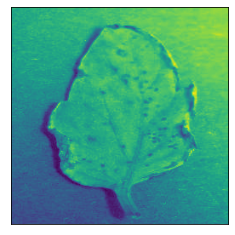

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
TOMATO TARGET SPOT


In [ ]:
import tensorflow as tf
from tensorflow import keras
from google.colab.patches import cv2_imshow

#test_img = ''
#test_img_path = tf.keras.utils.get_file('Test Image', origin=test_img)
testimage = r'/content/drive/MyDrive/b1.JPG'

img = cv2.imread(testimage,0)
plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

img = keras.preprocessing.image.load_img(
    testimage, target_size=(IMG_SIZE, IMG_SIZE)
)

img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
#score = tf.nn.softmax(predictions[0])
predictions
print(predictions)
if(predictions[0][0]>0.8):
    print("TOMATO BACTERIAL_SPOT")

if(predictions[0][1]>0.8):
    print("TOMATO CURL VIRUS")

if(predictions[0][2]>0.8):
    print("TOMATO LATE BLIGHT")

if(predictions[0][3]>0.8):
    print("TOMATO SEPTORIA SPOT")

if(predictions[0][4]>0.8):
    print("TOMATO TARGET SPOT")

 

In [ ]:
print(history.history.keys())

NameError: ignored